In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from tqdm import tqdm

# We define all the hyperparameters
In this section, we define all the hyperparameters and necessary stuff for performing unlearning

In [2]:
path = "D://datasets//Restricted_BNN//iris//iris.xlsx";#path for dataset
data = pd.read_excel(path)
n_examples_to_be_deleted = 20
wrong_example_indexes = np.random.choice(len(data),n_examples_to_be_deleted)
n_unique_classes = np.unique(data['label'])
input_size = 4
hidden1 = 10
hidden2 = 5
output = 3
data.head()
print(n_unique_classes)

[0 1 2]


In [3]:
#from sklearn.model_selection import train_test_split
def one_hot(y,n_unique):
    ret_val = np.zeros((len(y),n_unique))
    for i in range(len(y)):
        ret_val[i][y[i]] = 1;
    return ret_val
y=data['label']
X = data.drop(['label'],axis=1).values
y = one_hot(y.values,len(n_unique_classes))
#X_train,y_train,X_test,y_test = 

# Training

1) Model creation

In [12]:
import torch
import torch.nn as nn
import torch.optim as optim

class NeuralNetwork(nn.Module):
    def __init__(self,input_size,hidden1,hidden2,output):
        super().__init__()
        self.hidden1 = nn.Linear(input_size,hidden1)
        self.act = nn.ReLU()
        self.hidden2 = nn.Linear(hidden1,hidden2)
        self.output = nn.Linear(hidden2,output)
        self.soft = nn.Softmax()
    def forward(self,x):
        x = self.act(self.hidden1(x))
        x = self.act(self.hidden2(x))
        x = self.output(x)
        return self.soft(x)
#model = NeuralNetwork(input_size,hidden1,hidden2,output)
#print(model)

2) Model training

In [34]:
loss_fn = nn.CrossEntropyLoss()
n_epochs = 300
batch_sz = 30
l_rate = 0.01
optimizer = optim.Adam(model.parameters(), lr=l_rate)
loss_list=[]
for epoch in tqdm(range(n_epochs)):
    loss_val = 0;
    for i in range(0,len(X),batch_sz):
        X_batch = torch.Tensor(X[i:i+batch_sz])
        y_pred = model(X_batch)
        #print(y_pred)
        y_batch = torch.Tensor(y[i:i+batch_sz])
        loss = loss_fn(y_pred,y_batch)
        #print(loss)
        #input()
        loss_val = loss_val + loss.item();
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    loss_list.append(loss_val/batch_sz);

100%|███████████████████████████████████████████████████████████████████████████████| 300/300 [00:01<00:00, 211.86it/s]


Text(0.5,1,'Epochs vs Loss')

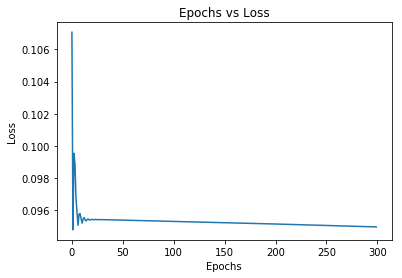

In [35]:
plt.plot(loss_list)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Epochs vs Loss')

In [41]:
with torch.no_grad():
    y_pred = model(torch.Tensor(X))
correct = 0
for i in range(len(y_pred)):
    val = torch.argmax(y_pred[i])
    actual = np.argmax(y[i])
    if(val==actual):
        correct+=1;
print("Accuracy=",correct/len(y))
#accuracy = (y_pred.round() == y).float().mean()
#print(f"Accuracy {accuracy}")

Accuracy= 0.9866666666666667


D:\anaconda\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


In [42]:
save_path = "D://datasets//Machine_Unlearning//iris_model.pth"
torch.save(model,save_path)

In [43]:
new_model = torch.load(save_path)
print(new_model)

NeuralNetwork(
  (hidden1): Linear(in_features=4, out_features=10, bias=True)
  (act): ReLU()
  (hidden2): Linear(in_features=10, out_features=5, bias=True)
  (output): Linear(in_features=5, out_features=3, bias=True)
  (soft): Softmax(dim=None)
)


In [44]:
with torch.no_grad():
    y_pred = new_model(torch.Tensor(X))
correct = 0
for i in range(len(y_pred)):
    val = torch.argmax(y_pred[i])
    actual = np.argmax(y[i])
    if(val==actual):
        correct+=1;
print("Accuracy=",correct/len(y))
#accuracy = (y_pred.round() == y).float().mean()
#print(f"Accuracy {accuracy}")

Accuracy= 0.9866666666666667


D:\anaconda\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


In [4]:
print(wrong_example_indexes)

[ 25  13  35  82 111  71 107  29 124 118  30 142  78  23  35  33 133 104
   6   8]


In [5]:
X_new,y_new = [],[]
for i in range(len(wrong_example_indexes)):
    for j in n_unique_classes:
        X_new.append(X[wrong_example_indexes[i]])
        y_new.append(j)
X_new = np.array(X_new)
print(X_new)

[[5.  3.  1.6 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.  1.6 0.2]
 [4.3 3.  1.1 0.1]
 [4.3 3.  1.1 0.1]
 [4.3 3.  1.1 0.1]
 [5.  3.2 1.2 0.2]
 [5.  3.2 1.2 0.2]
 [5.  3.2 1.2 0.2]
 [5.8 2.7 3.9 1.2]
 [5.8 2.7 3.9 1.2]
 [5.8 2.7 3.9 1.2]
 [6.4 2.7 5.3 1.9]
 [6.4 2.7 5.3 1.9]
 [6.4 2.7 5.3 1.9]
 [6.1 2.8 4.  1.3]
 [6.1 2.8 4.  1.3]
 [6.1 2.8 4.  1.3]
 [7.3 2.9 6.3 1.8]
 [7.3 2.9 6.3 1.8]
 [7.3 2.9 6.3 1.8]
 [4.7 3.2 1.6 0.2]
 [4.7 3.2 1.6 0.2]
 [4.7 3.2 1.6 0.2]
 [6.7 3.3 5.7 2.1]
 [6.7 3.3 5.7 2.1]
 [6.7 3.3 5.7 2.1]
 [7.7 2.6 6.9 2.3]
 [7.7 2.6 6.9 2.3]
 [7.7 2.6 6.9 2.3]
 [4.8 3.1 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.8 2.7 5.1 1.9]
 [5.8 2.7 5.1 1.9]
 [5.8 2.7 5.1 1.9]
 [6.  2.9 4.5 1.5]
 [6.  2.9 4.5 1.5]
 [6.  2.9 4.5 1.5]
 [5.1 3.3 1.7 0.5]
 [5.1 3.3 1.7 0.5]
 [5.1 3.3 1.7 0.5]
 [5.  3.2 1.2 0.2]
 [5.  3.2 1.2 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 4.2 1.4 0.2]
 [5.5 4.2 1.4 0.2]
 [5.5 4.2 1.4 0.2]
 [6.3 2.8 5.1 1.5]
 [6.3 2.8 5.1 1.5]
 [6.3 2.8 5.1 1.5]
 [6.5 3.  5.8 2.2]
 [6.5 3.  5.

In [6]:
deleted_indexes = []
for i in range(len(wrong_example_indexes)):
    true_ = np.argmax(y[wrong_example_indexes[i]])
    deleted_indexes.append(int(i*len(n_unique_classes)+true_))
print(deleted_indexes)

[0, 3, 6, 10, 14, 16, 20, 21, 26, 29, 30, 35, 37, 39, 42, 45, 50, 53, 54, 57]


In [7]:
X_new = np.delete(X_new,deleted_indexes,axis=0)
print(X_new)
y_new = np.delete(y_new,deleted_indexes)

[[5.  3.  1.6 0.2]
 [5.  3.  1.6 0.2]
 [4.3 3.  1.1 0.1]
 [4.3 3.  1.1 0.1]
 [5.  3.2 1.2 0.2]
 [5.  3.2 1.2 0.2]
 [5.8 2.7 3.9 1.2]
 [5.8 2.7 3.9 1.2]
 [6.4 2.7 5.3 1.9]
 [6.4 2.7 5.3 1.9]
 [6.1 2.8 4.  1.3]
 [6.1 2.8 4.  1.3]
 [7.3 2.9 6.3 1.8]
 [7.3 2.9 6.3 1.8]
 [4.7 3.2 1.6 0.2]
 [4.7 3.2 1.6 0.2]
 [6.7 3.3 5.7 2.1]
 [6.7 3.3 5.7 2.1]
 [7.7 2.6 6.9 2.3]
 [7.7 2.6 6.9 2.3]
 [4.8 3.1 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.8 2.7 5.1 1.9]
 [5.8 2.7 5.1 1.9]
 [6.  2.9 4.5 1.5]
 [6.  2.9 4.5 1.5]
 [5.1 3.3 1.7 0.5]
 [5.1 3.3 1.7 0.5]
 [5.  3.2 1.2 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 4.2 1.4 0.2]
 [5.5 4.2 1.4 0.2]
 [6.3 2.8 5.1 1.5]
 [6.3 2.8 5.1 1.5]
 [6.5 3.  5.8 2.2]
 [6.5 3.  5.8 2.2]
 [4.6 3.4 1.4 0.3]
 [4.6 3.4 1.4 0.3]
 [4.4 2.9 1.4 0.2]
 [4.4 2.9 1.4 0.2]]


In [8]:
final_new_dataset = {'col1':X_new[:,0],'col2':X_new[:,1],'col3':X_new[:,2],'col4':X_new[:,3],'label':y_new}

In [9]:
new_data = pd.DataFrame(final_new_dataset)
new_data

,col1,col2,col3,col4,label
0,5.0,3.0,1.6,0.2,1
1,5.0,3.0,1.6,0.2,2
2,4.3,3.0,1.1,0.1,1
3,4.3,3.0,1.1,0.1,2
4,5.0,3.2,1.2,0.2,1
5,5.0,3.2,1.2,0.2,2
6,5.8,2.7,3.9,1.2,0
7,5.8,2.7,3.9,1.2,2
8,6.4,2.7,5.3,1.9,0
9,6.4,2.7,5.3,1.9,1


In [75]:
y_one_hot = one_hot(y_new,len(n_unique_classes))
for epoch in tqdm(range(n_epochs)):
    loss_val = 0;
    for i in range(0,len(X),1):
        X_batch = torch.Tensor(X_new[i:i+1])
        y_pred = new_model(X_batch)
        #print(y_pred)
        y_batch = torch.Tensor(y_one_hot[i:i+1])
        #print(y_batch)
        loss = loss_fn(y_pred,y_batch)
        #print(loss)
        #input()
        loss_val = loss_val + loss.item();
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

100%|████████████████████████████████████████████████████████████████████████████████| 300/300 [01:33<00:00,  3.21it/s]


# Comparison of Accuracy

1) With original model

In [76]:
with torch.no_grad():
    y_pred = model(torch.Tensor(X))
correct = 0
for i in range(len(y_pred)):
    val = torch.argmax(y_pred[i])
    actual = np.argmax(y[i])
    if(val==actual):
        correct+=1;
print("Accuracy=",correct/len(y))

Accuracy= 0.9733333333333334


D:\anaconda\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


In [77]:
with torch.no_grad():
    y_pred = new_model(torch.Tensor(X))
correct = 0
for i in range(len(y_pred)):
    val = torch.argmax(y_pred[i])
    actual = np.argmax(y[i])
    if(val==actual):
        correct+=1;
print("Accuracy=",correct/len(y))

Accuracy= 0.9866666666666667


D:\anaconda\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


In [85]:
print(model(torch.Tensor(X_new[8])))

tensor([1.0000e+00, 9.4159e-09, 2.2897e-42], grad_fn=<SoftmaxBackward0>)


D:\anaconda\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


# Direct function

In [10]:
#Train on the combined data
data = data.append(new_data)
print(len(data))

y=data['label']
X = data.drop(['label'],axis=1).values
y = one_hot(y.values,len(n_unique_classes))

190


In [23]:
fmodel = NeuralNetwork(input_size,hidden1,hidden2,output)
print(fmodel)
loss_fn = nn.CrossEntropyLoss()
n_epochs = 100
batch_sz = 19
l_rate = 0.01
optimizer = optim.Adam(fmodel.parameters(), lr=l_rate)
loss_list=[]
for epoch in tqdm(range(n_epochs)):
    loss_val = 0;
    for i in range(0,len(X),batch_sz):
        X_batch = torch.Tensor(X[i:i+batch_sz])
        y_pred = fmodel(X_batch)
        #print(y_pred)
        y_batch = torch.Tensor(y[i:i+batch_sz])
        loss = loss_fn(y_pred,y_batch)
        #print(loss)
        #input()
        loss_val = loss_val + loss.item();
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    loss_list.append(loss_val/batch_sz);

NeuralNetwork(
  (hidden1): Linear(in_features=4, out_features=10, bias=True)
  (act): ReLU()
  (hidden2): Linear(in_features=10, out_features=5, bias=True)
  (output): Linear(in_features=5, out_features=3, bias=True)
  (soft): Softmax(dim=None)
)


100%|███████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 134.29it/s]


Text(0.5,1,'Epochs vs Loss')

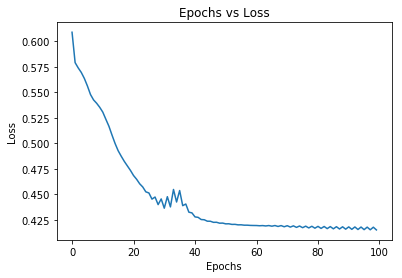

In [24]:
plt.plot(loss_list)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Epochs vs Loss')

In [25]:
with torch.no_grad():
    y_pred = fmodel(torch.Tensor(X))
correct = 0
wrong_index_list = list()
for i in range(len(y_pred)):
    val = torch.argmax(y_pred[i])
    actual = np.argmax(y[i])
    if(val==actual):
        correct+=1;
    else:
        wrong_index_list.append(i)
print("Accuracy=",correct/len(y))

Accuracy= 0.7684210526315789


D:\anaconda\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


In [26]:
print(wrong_index_list)
print("=============================")
print(wrong_example_indexes)

[68, 70, 72, 83, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189]
[ 25  13  35  82 111  71 107  29 124 118  30 142  78  23  35  33 133 104
   6   8]


In [26]:
save_path = "D://datasets//Machine_Unlearning//iris_model.pth" 
new_model = torch.load(save_path)
print(new_model)
with torch.no_grad():
    y_pred = new_model(torch.Tensor(X))
correct = 0
for i in range(len(y_pred)):
    val = torch.argmax(y_pred[i])
    actual = np.argmax(y[i])
    if(val==actual):
        correct+=1;
print("Accuracy=",correct/len(y))

NeuralNetwork(
  (hidden1): Linear(in_features=4, out_features=10, bias=True)
  (act): ReLU()
  (hidden2): Linear(in_features=10, out_features=5, bias=True)
  (output): Linear(in_features=5, out_features=3, bias=True)
  (soft): Softmax(dim=None)
)
Accuracy= 0.9866666666666667


D:\anaconda\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


In [28]:
for i in wrong_example_indexes:
    y_pred = fmodel(torch.Tensor(X[i]))
    print(i," ==> ",y_pred)

25  ==>  tensor([9.9771e-01, 2.2888e-03, 8.9478e-11], grad_fn=<SoftmaxBackward0>)
13  ==>  tensor([9.9883e-01, 1.1738e-03, 6.4197e-11], grad_fn=<SoftmaxBackward0>)
35  ==>  tensor([9.9920e-01, 8.0170e-04, 1.0146e-11], grad_fn=<SoftmaxBackward0>)
82  ==>  tensor([1.2892e-03, 9.9834e-01, 3.7537e-04], grad_fn=<SoftmaxBackward0>)
111  ==>  tensor([2.2602e-08, 1.0962e-03, 9.9890e-01], grad_fn=<SoftmaxBackward0>)
71  ==>  tensor([8.8811e-04, 9.9878e-01, 3.2876e-04], grad_fn=<SoftmaxBackward0>)
107  ==>  tensor([2.4097e-09, 6.2776e-04, 9.9937e-01], grad_fn=<SoftmaxBackward0>)
29  ==>  tensor([9.9802e-01, 1.9769e-03, 1.0536e-10], grad_fn=<SoftmaxBackward0>)
124  ==>  tensor([9.5762e-09, 7.9758e-04, 9.9920e-01], grad_fn=<SoftmaxBackward0>)
118  ==>  tensor([3.7811e-11, 5.7635e-05, 9.9994e-01], grad_fn=<SoftmaxBackward0>)
30  ==>  tensor([9.9787e-01, 2.1268e-03, 1.0877e-10], grad_fn=<SoftmaxBackward0>)
142  ==>  tensor([5.9824e-08, 1.4398e-03, 9.9856e-01], grad_fn=<SoftmaxBackward0>)
78  ==>  te

D:\anaconda\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


# Comparing with dataset having the note required data removed

In [35]:
pdata = pd.read_excel(path)
polished_data = pdata.drop(wrong_example_indexes)
polished_data.head()

,col1,col2,col3,col4,label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [36]:
print(len(polished_data))

131


In [39]:
yp=polished_data['label']
Xp = polished_data.drop(['label'],axis=1).values
yp = one_hot(yp.values,len(n_unique_classes))

In [41]:
pmodel = NeuralNetwork(input_size,hidden1,hidden2,output)
print(pmodel)
loss_fn = nn.CrossEntropyLoss()
n_epochs = 100
batch_sz = 10
l_rate = 0.01
optimizer = optim.Adam(pmodel.parameters(), lr=l_rate)
loss_list=[]
for epoch in tqdm(range(n_epochs)):
    loss_val = 0;
    for i in range(0,len(X),batch_sz):
        X_batch = torch.Tensor(X[i:i+batch_sz])
        y_pred = pmodel(X_batch)
        #print(y_pred)
        y_batch = torch.Tensor(y[i:i+batch_sz])
        loss = loss_fn(y_pred,y_batch)
        #print(loss)
        #input()
        loss_val = loss_val + loss.item();
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    loss_list.append(loss_val/batch_sz);

NeuralNetwork(
  (hidden1): Linear(in_features=4, out_features=10, bias=True)
  (act): ReLU()
  (hidden2): Linear(in_features=10, out_features=5, bias=True)
  (output): Linear(in_features=5, out_features=3, bias=True)
  (soft): Softmax(dim=None)
)


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 67.53it/s]


Text(0.5,1,'Epochs vs Loss')

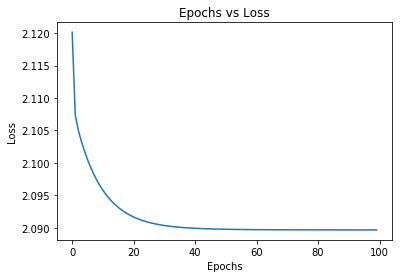

In [42]:
plt.plot(loss_list)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Epochs vs Loss')

In [43]:
with torch.no_grad():
    y_pred = fmodel(torch.Tensor(X))
correct = 0
wrong_index_list = list()
for i in range(len(y_pred)):
    val = torch.argmax(y_pred[i])
    actual = np.argmax(y[i])
    if(val==actual):
        correct+=1;
    else:
        wrong_index_list.append(i)
print("Accuracy=",correct/len(y))

Accuracy= 0.7684210526315789


D:\anaconda\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
